### Objective
The goal of this assignment is to apply various data cleaning techniques to detect and correct data quality issues such as missing, noisy, inconsistent, and duplicate records.

### Dataset:
https://www.kaggle.com/datasets/uciml/adult-census-income

## Task 1: Load and Explore

#### 1. Import the dataset into Python (Pandas) or R or other programming languages.


In [2]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
#Load Dataset
Data_file = "adult.csv"
df = pd.read_csv(Data_file, skipinitialspace=True)
#Strip whitespace in string columns
for c in df.select_dtypes(include='object').columns:
    df[c]=df[c].str.strip()

# rename columns replacing dots with underscore
df.columns = df.columns.str.replace(r'\.', '_', regex=True)

#### 2. Display the dataset shape, column names, and first few records.

In [4]:
df.shape

(32561, 15)

#### Dataset columns names

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

#### Displaying sample records

In [6]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


## Task 2: Handle Missing Data


##### 1. Identify columns containing missing or placeholder values (e.g., "?" or NaN).

In [7]:
# Check for "?" values in each column
print("\nCount of '?' values in each column:")
print((df == "?").sum())

# Check for NaN values in each column
print("\nCount of NaN values in each column:")
print(df.isna().sum())



Count of '?' values in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Count of NaN values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
# convert "?" to a recognized missing value NAN

df.replace("?", np.nan, inplace=True)


# Get the percentage of missing values in each column
missing_percentages = (df.isna().sum() / len(df)) * 100
missing_percentages = missing_percentages.round(2)

# Show only columns with missing values
print("\nPercentage of missing values in affected columns:")
print(missing_percentages[missing_percentages > 0])



Percentage of missing values in affected columns:
workclass         5.64
occupation        5.66
native_country    1.79
dtype: float64


### Visualizing the missing values

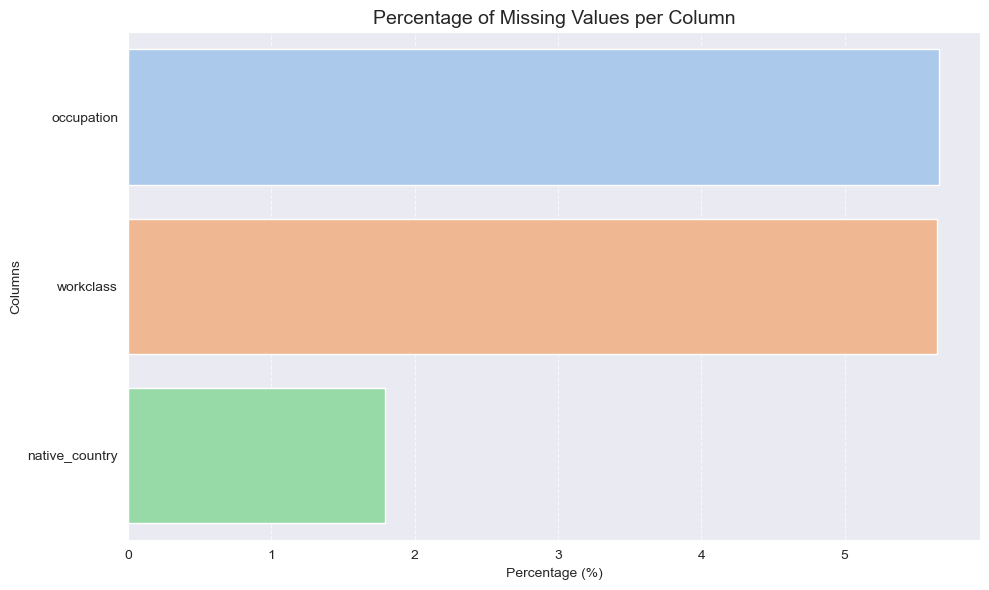

In [9]:
# Visualize missing values
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=missing_data.values,
    y=missing_data.index,
    hue=missing_data.index,
    palette="pastel",
    legend=False
)

plt.title("Percentage of Missing Values per Column", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Apply appropriate handling methods:
    - Deletion (remove rows or columns with too many missing values)
    - Imputation (mean, median, mode, or predictive filling)

In [10]:
# 3. Set the threshold for column deletion (e.g., 30% missing values)
threshold = 0.3 * len(df)   # keep columns with at least 70% non-missing values
df_cleaned = df.dropna(axis=1, thresh=threshold)

print("\nShape before column deletion:", df.shape)
print("Shape after column deletion:", df_cleaned.shape)

# 4. Imputation based on data type
# For categorical variables: use mode (most frequent value)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df_cleaned[col].isna().any():
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)
        print(f"\nImputed '{col}' with mode value: {mode_value}")

# For numerical variables: use median (more robust to outliers than mean)
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    if df_cleaned[col].isna().any():
        median_value = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_value)
        print(f"\nImputed '{col}' with median value: {median_value}")

# 5. Verify no missing values remain
print("\nRemaining missing values after imputation:")
print(df_cleaned.isna().sum()[df_cleaned.isna().sum() > 0])

# 6. Show the final shape of the cleaned dataset
print("\nFinal dataset shape:", df_cleaned.shape)

df_cleaned.to_csv("adult_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'adult_cleaned.csv'")

df.head(3)


Shape before column deletion: (32561, 15)
Shape after column deletion: (32561, 15)

Imputed 'workclass' with mode value: Private

Imputed 'occupation' with mode value: Prof-specialty

Imputed 'native_country' with mode value: United-States

Remaining missing values after imputation:
Series([], dtype: int64)

Final dataset shape: (32561, 15)

Cleaned dataset saved as 'adult_cleaned.csv'


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K


### Task 3: Detect and Treat Noisy Data

#### 1. Identify potential outliers in numeric column
#### 2. Handling potential outliers or noisy data points

In [11]:
# Check the cleaned dataset

# View the first 5 rows
print(df_cleaned.head())

# Check dataset shape
print(df_cleaned.shape)

# Get column names
print(df_cleaned.columns)

# Check for missing values
print(df_cleaned.isnull().sum())

   age workclass  fnlwgt     education  education_num marital_status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital_gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [12]:
# 0. Load the cleaned dataset
df_cleaned = pd.read_csv("adult_cleaned.csv")
# 1. First, let's identify numeric columns

numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols.tolist())

# 2. Detect outliers using IQR method
Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_cleaned[numeric_cols] < lower_bound) | (df_cleaned[numeric_cols] > upper_bound))

# Print the number of outliers in each column
print("\nNumber of outliers in each numeric column:")
print(outliers.sum())


Numeric columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Number of outliers in each numeric column:
age                143
fnlwgt             992
education_num     1198
capital_gain      2712
capital_loss      1519
hours_per_week    9008
dtype: int64


#### Visualizing the outliers

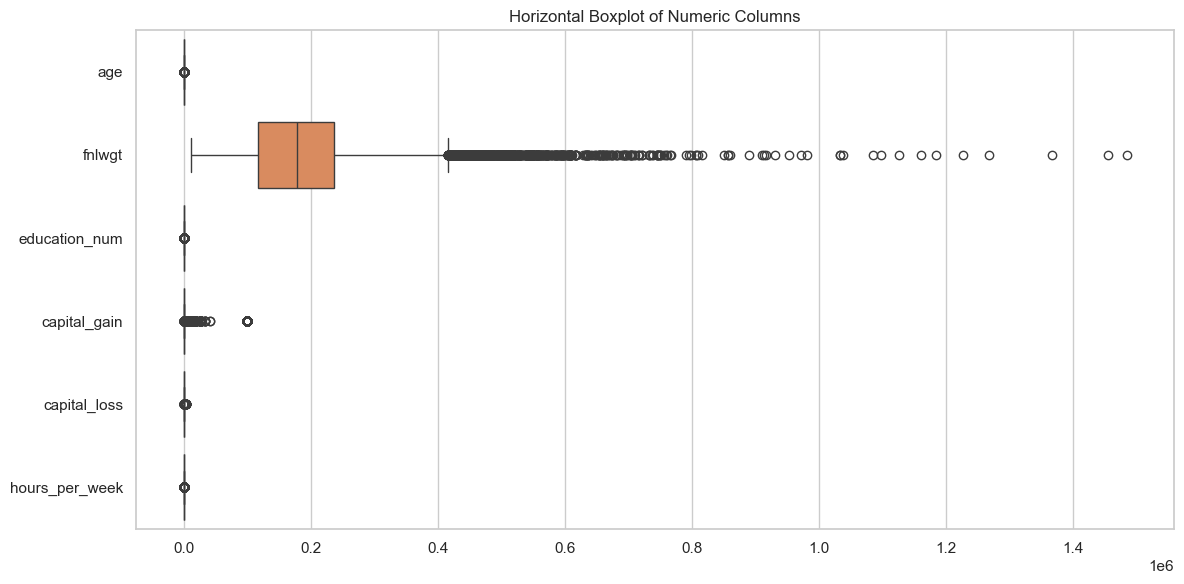


Summary statistics for numeric columns:
                age         fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000   32561.000000   32561.000000       32561.0       32561.0   
mean      38.555603  186829.079236      10.124321           0.0           0.0   
std       13.556130   95129.625135       2.459770           0.0           0.0   
min       17.000000   12285.000000       4.500000           0.0           0.0   
25%       28.000000  117827.000000       9.000000           0.0           0.0   
50%       37.000000  178356.000000      10.000000           0.0           0.0   
75%       48.000000  237051.000000      12.000000           0.0           0.0   
max       78.000000  415887.000000      16.000000           0.0           0.0   

       hours_per_week  
count    32561.000000  
mean        41.202451  
std          6.187005  
min         32.500000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         52.500000  


In [28]:
# 3. Visualize the distribution and outliers

# # Box plots
# plt.figure(figsize=(12, 6))
# df_cleaned[numeric_cols].boxplot()
# plt.title("Boxplot of Numeric Columns (Outliers Shown)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Horizontal box plots for better readability
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Horizontal Boxplot of Numeric Columns")
plt.tight_layout()
plt.show()

# 4. Calculate and print summary statistics
print("\nSummary statistics for numeric columns:")
print(df_cleaned[numeric_cols].describe())



#### Handling outliers using capping (windowrization)


Before outlier treatment:
                age         fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000   32561.000000   32561.000000       32561.0       32561.0   
mean      38.555603  186829.079236      10.124321           0.0           0.0   
std       13.556130   95129.625135       2.459770           0.0           0.0   
min       17.000000   12285.000000       4.500000           0.0           0.0   
25%       28.000000  117827.000000       9.000000           0.0           0.0   
50%       37.000000  178356.000000      10.000000           0.0           0.0   
75%       48.000000  237051.000000      12.000000           0.0           0.0   
max       78.000000  415887.000000      16.000000           0.0           0.0   

       hours_per_week  
count    32561.000000  
mean        41.202451  
std          6.187005  
min         32.500000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         52.500000  

After outlier treatment:
 

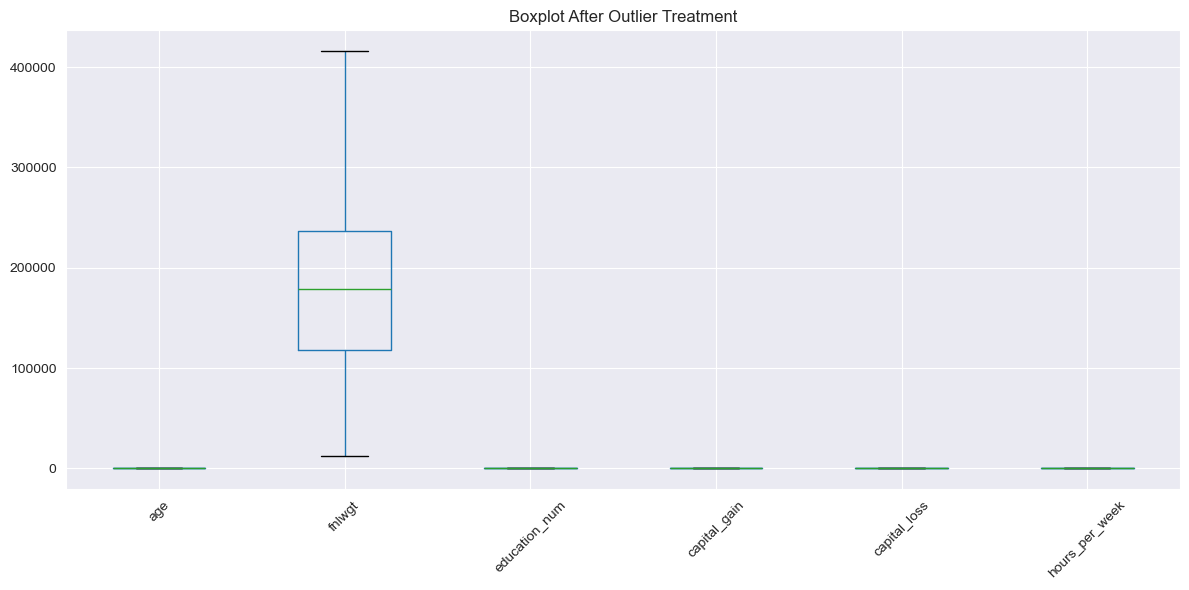

In [14]:
# 5. Handle outliers using capping (winsorization)
for column in numeric_cols:
    df_cleaned[column] = df_cleaned[column].clip(
        lower=lower_bound[column],
        upper=upper_bound[column]
    )

# 6. Compare statistics before and after treatment
print("\nBefore outlier treatment:")
print(df_cleaned[numeric_cols].describe())

print("\nAfter outlier treatment:")
print(df_cleaned[numeric_cols].describe())

# 7. Verify the effect of treatment
plt.figure(figsize=(12, 6))
df_cleaned[numeric_cols].boxplot()
plt.title("Boxplot After Outlier Treatment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Task 4: Identify and Fix Inconsistent Data

#### 1. Standardize categorical values (e.g., “Male”, “male”, “M” → “Male”).
#### 2. Correct inconsistent formats:
    - Dates (DD/MM/YYYY vs MM-DD-YYYY)
    - Categorical labels (spaces, capitalization, typos)

In [29]:
# 1. First, let's identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())


Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [16]:
# 2. Function to standardize text values
def standardize_text(text):
    if pd.isna(text):
        return text
    return str(text).strip().lower().capitalize()


In [30]:
# 3. Create a mapping dictionary for common variations
gender_mapping = {
    'male': 'Male',
    'm': 'Male',
    'male ': 'Male',
    'female': 'Female',
    'f': 'Female',
    'female ': 'Female'
}


In [31]:
# 4. Standardize categorical values

# Handle gender standardization
if 'sex' in df_cleaned.columns:
    df_cleaned['sex'] = df_cleaned['sex'].astype(str).str.lower().map(gender_mapping).fillna(df_cleaned['sex'])

# Standardize other categorical columns
for col in categorical_cols:
    if col != 'sex':  # Skip the sex column as it's already handled
        df_cleaned[col] = df_cleaned[col].apply(lambda x: standardize_text(x) if pd.notna(x) else x)

# 5. Print unique values before and after standardization
for col in categorical_cols:
    print(f"\nUnique values in {col} before standardization:")
    print(sorted([str(x) for x in df[col].unique() if pd.notna(x)]))
    print(f"\nUnique values in {col} after standardization:")
    print(sorted([str(x) for x in df_cleaned[col].unique() if pd.notna(x)]))



Unique values in workclass before standardization:
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

Unique values in workclass after standardization:
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

Unique values in education before standardization:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

Unique values in education after standardization:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'Hs-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

Unique values in marital_status before standardization:
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

Unique

In [33]:
# 6. check_inconsistencies function to handle non-string values
def check_inconsistencies(series):
    # Convert to string and handle NaN values
    str_series = series.astype(str).replace('nan', np.nan)

    # Check for leading/trailing spaces
    space_issues = str_series[str_series.str.contains(r'^\s|\s$', na=False)]

    # Check for mixed case versions of the same word
    lowercase_counts = str_series.str.lower().value_counts()
    case_issues = lowercase_counts[lowercase_counts > 1]

    return space_issues, case_issues

print("\nChecking for remaining inconsistencies:")
for col in categorical_cols:
    space_issues, case_issues = check_inconsistencies(df_cleaned[col])
    if len(space_issues) > 0:
        print(f"\nFound values with leading/trailing spaces in {col}:")
        print(space_issues.unique())
    if len(case_issues) > 0:
        print(f"\nFound potential case inconsistencies in {col}:")
        print(case_issues)



Checking for remaining inconsistencies:

Found potential case inconsistencies in workclass:
workclass
private             24532
self-emp-not-inc     2541
local-gov            2093
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Name: count, dtype: int64

Found potential case inconsistencies in education:
education
hs-grad         10501
some-college     7291
bachelors        5355
masters          1723
assoc-voc        1382
11th             1175
assoc-acdm       1067
10th              933
7th-8th           646
prof-school       576
9th               514
12th              433
doctorate         413
5th-6th           333
1st-4th           168
preschool          51
Name: count, dtype: int64

Found potential case inconsistencies in marital_status:
marital_status
married-civ-spouse       14976
never-married            10683
divorced                  4443
separated                 1025
widowed                    

In [34]:
# 7. Summary of changes
print("\nSummary of standardization:")
for col in categorical_cols:
    original_unique = df[col].nunique()
    standardized_unique = df_cleaned[col].nunique()
    print(f"{col}: {original_unique} unique values -> {standardized_unique} unique values")

# 8. Optional: Add validation checks
def validate_categories(df, column, valid_categories):
    invalid = df[~df[column].isin(valid_categories)]
    return invalid

# Example validation for specific columns
valid_sex = {'Male', 'Female'}
invalid_sex = validate_categories(df_cleaned, 'sex', valid_sex)
if len(invalid_sex) > 0:
    print(f"\nFound invalid sex categories:")
    print(invalid_sex['sex'].unique())

# Save standardized dataset
df_cleaned.to_csv("adult_standardized.csv", index=False)



Summary of standardization:
workclass: 8 unique values -> 8 unique values
education: 16 unique values -> 16 unique values
marital_status: 7 unique values -> 7 unique values
occupation: 14 unique values -> 14 unique values
relationship: 6 unique values -> 6 unique values
race: 5 unique values -> 5 unique values
sex: 2 unique values -> 2 unique values
native_country: 41 unique values -> 41 unique values
income: 2 unique values -> 2 unique values


## Task 5: Remove Duplicates
   1. Identify duplicate rows.
   2. Remove or merge duplicates appropriately.

In [35]:
# 1. Check for exact duplicates
exact_duplicates = df_cleaned.duplicated()
exact_duplicate_count = exact_duplicates.sum()

print(f"Number of exact duplicate rows: {exact_duplicate_count}")

if exact_duplicate_count > 0:
    print("\nExample of duplicate rows:")
    print(df.loc[df.duplicated(keep='first')].head())

# 2. Check for duplicates with subset of columns
columns_to_check = df.columns.tolist()
subset_duplicates = df.duplicated(subset=columns_to_check, keep='first')
subset_duplicate_count = subset_duplicates.sum()

print(f"\nNumber of duplicate rows (based on all columns): {subset_duplicate_count}")

# 3. Analyze duplicates in more detail
if subset_duplicate_count > 0:
    # Create a copy for duplicate analysis
    duplicate_rows = df.loc[df.duplicated(subset=columns_to_check, keep=False)].copy()
    print("\nSummary of duplicate rows:")
    print(f"Total number of rows involved in duplicates: {len(duplicate_rows)}")

    # Group duplicates to see their frequency
    duplicate_groups = duplicate_rows.groupby(columns_to_check).size().reset_index(name='frequency')
    print("\nDuplicate patterns:")
    print(f"Number of unique duplicate patterns: {len(duplicate_groups)}")
    print("\nMost common duplicate patterns:")
    print(duplicate_groups.nlargest(5, 'frequency'))

# 4. Remove duplicates and create cleaned dataset
# Method 1: Keep the first occurrence
df_clean_first = df.drop_duplicates(subset=columns_to_check, keep='first')

# Method 2: Keep the last occurrence
df_clean_last = df.drop_duplicates(subset=columns_to_check, keep='last')

# Method 3: Remove all instances of duplicates
df_clean_none = df.drop_duplicates(subset=columns_to_check, keep=False)

# Print results
print("\nDataset shapes after duplicate removal:")
print(f"Original shape: {df.shape}")
print(f"After removing duplicates (keeping first): {df_clean_first.shape}")
print(f"After removing duplicates (keeping last): {df_clean_last.shape}")
print(f"After removing all instances of duplicates: {df_clean_none.shape}")

# 5. Analyze the impact of duplicate removal
def compare_distributions(original_df, cleaned_df, columns):
    """Compare value distributions before and after duplicate removal"""
    print("\nValue distribution comparison (before vs after duplicate removal):")
    for col in columns:
        if original_df[col].dtype in ['int64', 'float64']:
            print(f"\n{col} - Numeric Summary:")
            print("Before:")
            print(original_df[col].describe())
            print("\nAfter:")
            print(cleaned_df[col].describe())
        else:
            print(f"\n{col} - Category Counts:")
            print("Before:")
            print(original_df[col].value_counts().head())
            print("\nAfter:")
            print(cleaned_df[col].value_counts().head())

# Compare distributions for a few key columns
key_columns = df.columns[:5]  # First 5 columns as an example
compare_distributions(df, df_clean_first, key_columns)

# 6. Create a final dataset with a duplicate flag
# Create a new DataFrame instead of modifying the existing one
duplicate_indices = df[subset_duplicates].index
df_final = df_clean_first.copy()
df_final['was_duplicate'] = pd.Series(False, index=df_final.index)
df_final.loc[df_final.index.isin(duplicate_indices), 'was_duplicate'] = True

# Save the cleaned dataset
df_final.to_csv("adult_no_duplicates.csv", index=False)

# 7. Print final summary
print("\nFinal Summary:")
print(f"Original number of rows: {len(df)}")
print(f"Number of duplicate rows removed: {len(df) - len(df_final)}")
print(f"Final number of rows: {len(df_final)}")
print(f"Percentage of data reduced: {((len(df) - len(df_final)) / len(df) * 100):.2f}%")

# 8. Print duplicate statistics by column
print("\nDuplicate Statistics by Column:")
for column in df.columns:
    dup_count = df[df.duplicated(subset=[column], keep=False)].shape[0]
    print(f"{column}: {dup_count} rows with duplicate values ({(dup_count/len(df)*100):.2f}%)")

# 7. Save the final cleaned dataset
df_final.to_csv("cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved successfully as 'cleaned.csv'")


Number of exact duplicate rows: 53

Example of duplicate rows:
       age workclass  fnlwgt     education  education_num marital_status  \
8453    25   Private  308144     Bachelors             13  Never-married   
8645    90   Private   52386  Some-college             10  Never-married   
12202   21   Private  250051  Some-college             10  Never-married   
14346   20   Private  107658  Some-college             10  Never-married   
15603   25   Private  195994       1st-4th              2  Never-married   

            occupation   relationship                race     sex  \
8453      Craft-repair  Not-in-family               White    Male   
8645     Other-service  Not-in-family  Asian-Pac-Islander    Male   
12202   Prof-specialty      Own-child               White  Female   
14346     Tech-support  Not-in-family               White  Female   
15603  Priv-house-serv  Not-in-family               White  Female   

       capital_gain  capital_loss  hours_per_week native_country 

## Task 6: Handle Irrelevant or Redundant Data
    1. Drop columns that are not useful for analysis (e.g., ID fields).
    2. Merge or encode attributes where necessary.

#### Marging neccessary columns
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [42]:
cleaned_df = pd.read_csv("adult_cleaned.csv")
cleaned_df['income'] = cleaned_df['income'].apply(lambda x: 1 if x == '>50K' else 0)


Exported cleaned dataset

In [43]:
cleaned_df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


### Visualize the data

## Visualize the data

Dataset shape: (32561, 15)

Column names:
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

Basic statistics:
                  age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         8           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     24532           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%  

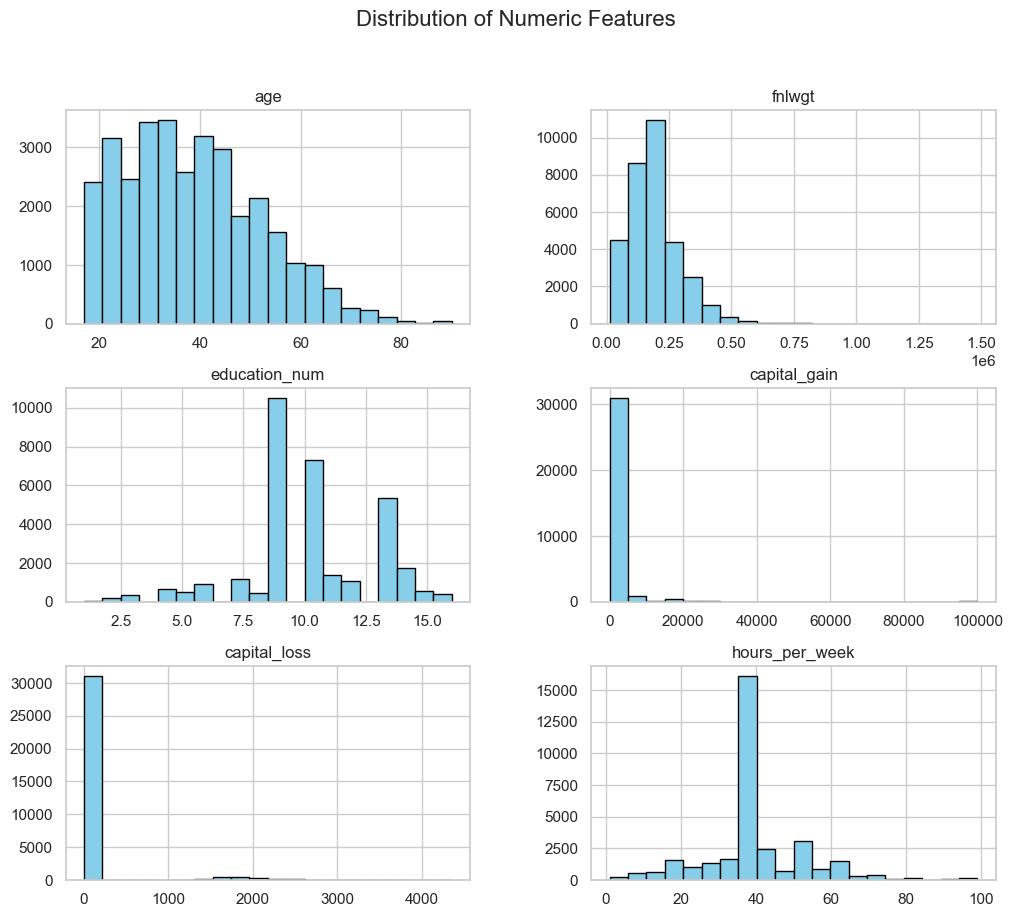

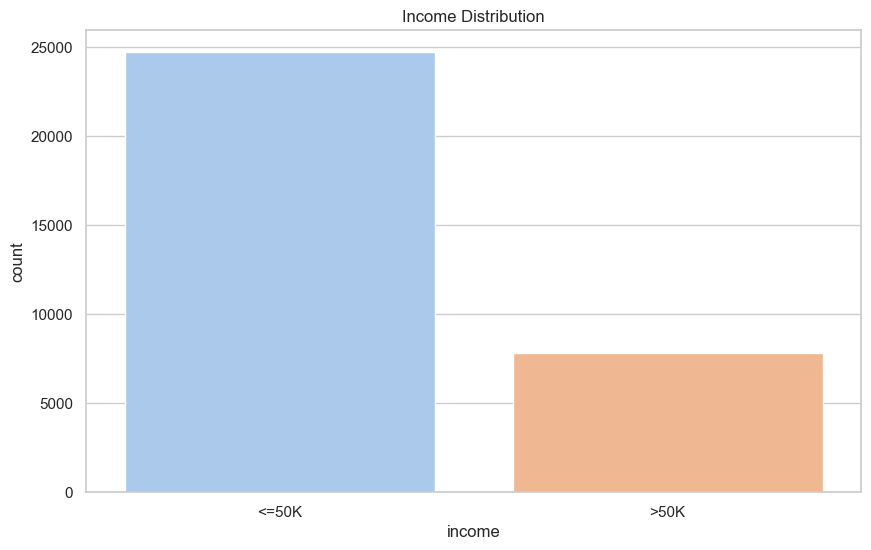

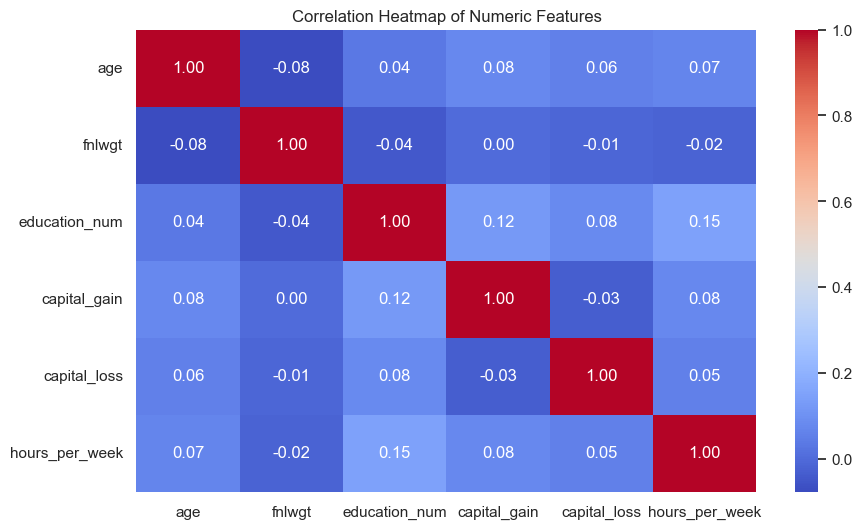

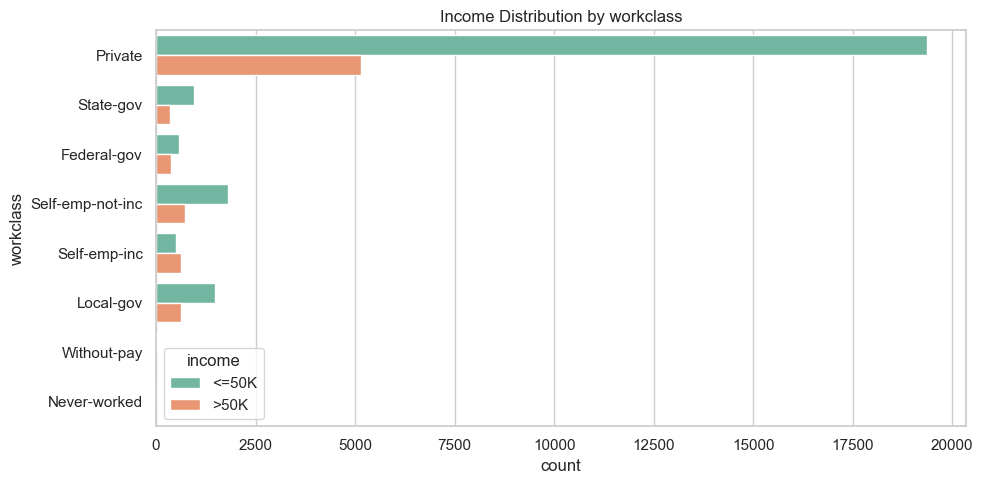

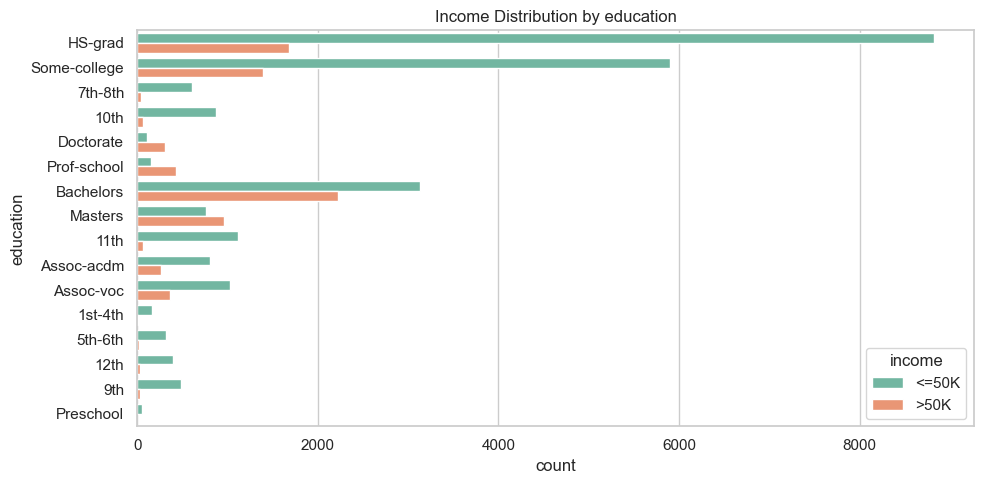

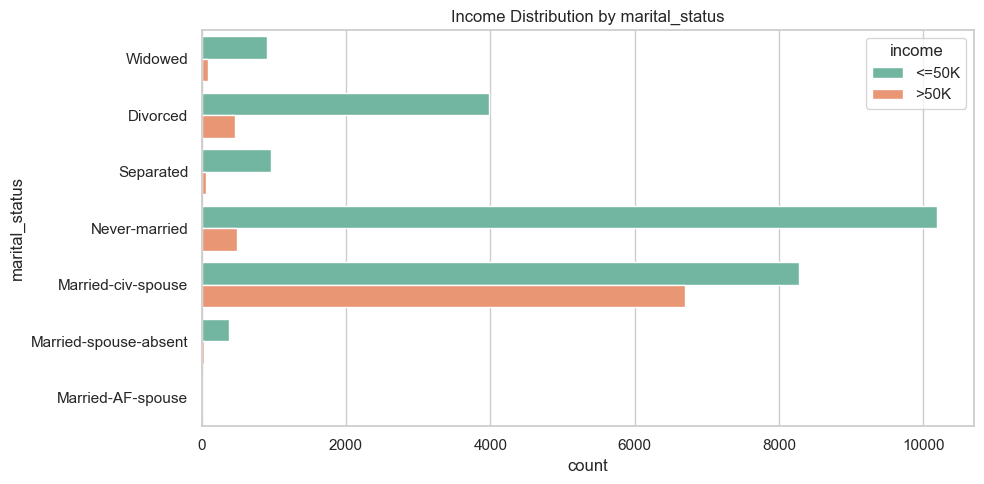

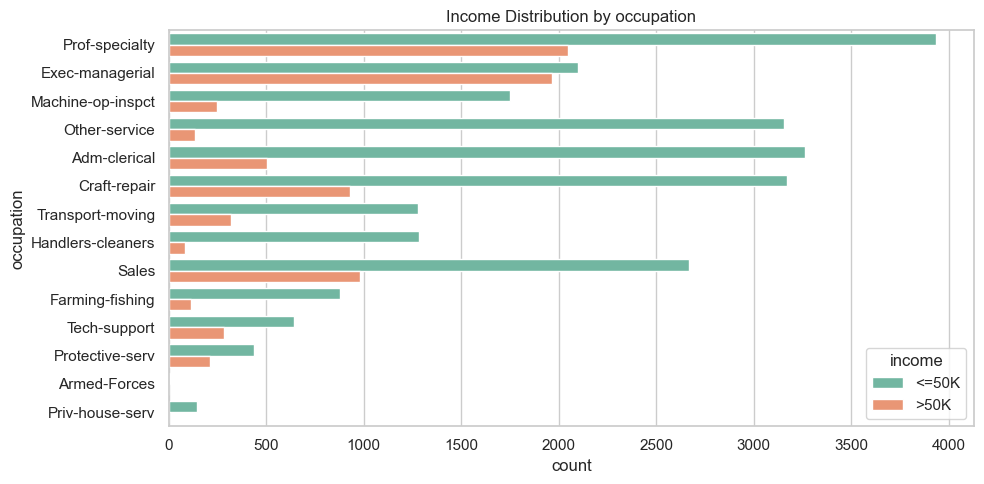

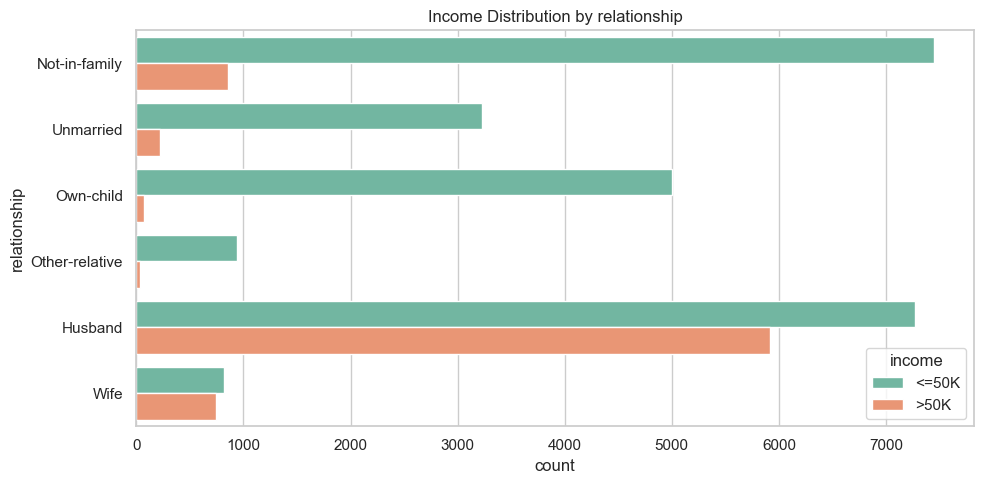

In [44]:
# Load dataset
df_cleaned_final = pd.read_csv("adult_cleaned.csv")

# Set visual style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Overview of the data
print("Dataset shape:", df_cleaned_final.shape)
print("\nColumn names:\n", df_cleaned_final.columns.tolist())
print("\nBasic statistics:\n", df_cleaned_final.describe(include='all'))

# 2️⃣ Distribution of numeric columns
numeric_cols = df_cleaned_final.select_dtypes(include=['int64', 'float64']).columns

df_cleaned_final[numeric_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

# 3️⃣ Distribution of income (target variable)
if 'income' in df_cleaned_final.columns:
    # sns.countplot(x='income', data=df_cleaned_final, palette='pastel')
    sns.countplot(x='income', hue='income', data=df_cleaned_final, palette='pastel', legend=False)
    plt.title("Income Distribution")
    plt.show()



# 4️⃣ Correlation heatmap
corr = df_cleaned_final[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 5️⃣ Categorical vs Income (top 5 categorical variables)
categorical_cols = df_cleaned_final.select_dtypes(include='object').columns

for col in categorical_cols[:5]:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, hue='income', data=df_cleaned_final, palette='Set2')
    plt.title(f"Income Distribution by {col}")
    plt.tight_layout()
    plt.show()

# 6️⃣ Age vs Hours per week colored by Income
if {'age', 'hours-per-week', 'income'}.issubset(df_cleaned_final.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_cleaned_final,
        x='age',
        y='hours-per-week',
        hue='income',
        alpha=0.7,
        palette='coolwarm'
    )
    plt.title("Age vs Hours per Week by Income")
    plt.show()